# Clustering Challenge

Clustering is an *unsupervised* machine learning technique in which you train a model to group similar entities into clusters based on their features.

In this exercise, you must separate a dataset consisting of three numeric features (**A**, **B**, and **C**) into clusters. Run the cell below to load the data.

In [2]:
import pandas as pd

data = pd.read_csv('clusters.csv')
data.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


Your challenge is to identify the number of discrete clusters present in the data, and create a clustering model that separates the data into that number of clusters. You should also visualize the clusters to evaluate the level of separation achieved by your model.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [04 - Clustering Solution.ipynb](04%20-%20Clustering%20Solution.ipynb).

## Use PCA to create a 2D version of the features for visualization

In [4]:
from sklearn.decomposition import PCA

# Create a PCA object with 2 components
pca = PCA(n_components=2)

# Fit the PCA model to the data
pca.fit(data)

# Transform the data to the 2D version
data_2d = pca.transform(data)

data_2d

array([[ 2.43020019, -0.19793599],
       [ 3.50286676, -0.78094444],
       [-1.91736031,  0.00791411],
       ...,
       [-0.80145359,  0.54116049],
       [ 2.72441069, -0.24464671],
       [-1.32778101,  0.13668081]])

## Plot the unclustered data points

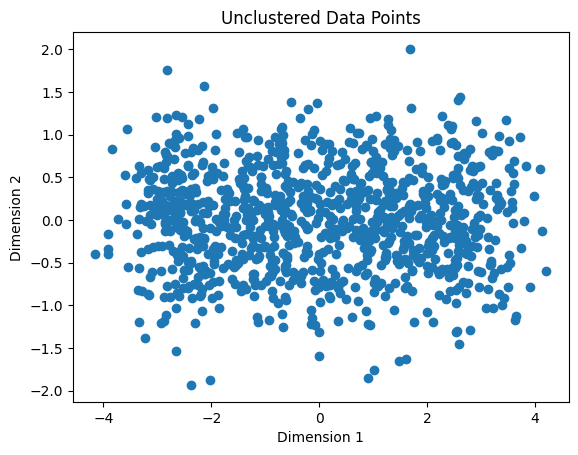

In [5]:
# Import libraries
import matplotlib.pyplot as plt

# Plot the unclustered data points
plt.scatter(data_2d[:, 0], data_2d[:, 1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Unclustered Data Points')
plt.show()


## Plot WCSS for cluster numbers

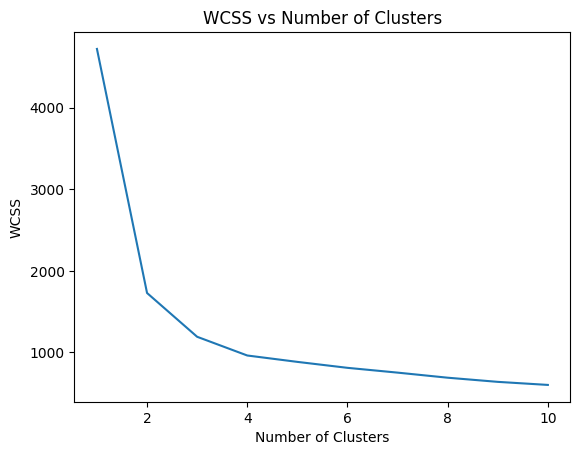

In [9]:
# Calculate WCSS for multiple cluster numbers

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Visualize the WCSS

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('WCSS vs Number of Clusters')
plt.show()


## Use KMeans clustering

In [14]:
# Import the KMeans class
from sklearn.cluster import KMeans

# Create a KMeans object with 3 clusters
kmeans = KMeans(n_clusters=4, random_state=0)

# Fit the KMeans model to the data
data_clusters = kmeans.fit_predict(data)

data_clusters


array([2, 2, 0, 0, 2, 2, 0, 3, 2, 2, 0, 1, 1, 3, 3, 3, 0, 1, 3, 3, 2, 3,
       2, 2, 3, 1, 0, 2, 1, 3, 1, 2, 0, 3, 3, 2, 3, 3, 2, 3, 3, 3, 0, 1,
       0, 2, 2, 0, 0, 3, 2, 1, 0, 0, 0, 0, 3, 2, 0, 2, 2, 2, 2, 2, 3, 3,
       1, 3, 1, 0, 1, 3, 3, 0, 1, 3, 3, 3, 2, 1, 3, 1, 0, 1, 3, 0, 1, 3,
       3, 1, 1, 1, 0, 3, 1, 3, 0, 3, 0, 1, 3, 1, 0, 1, 3, 1, 0, 3, 3, 0,
       3, 1, 2, 2, 1, 0, 1, 0, 2, 1, 3, 1, 0, 0, 2, 3, 1, 3, 0, 2, 1, 1,
       1, 3, 1, 1, 3, 2, 3, 1, 2, 1, 1, 2, 0, 0, 3, 0, 3, 3, 0, 2, 2, 3,
       2, 1, 2, 3, 3, 3, 1, 2, 0, 0, 3, 1, 1, 2, 2, 0, 2, 1, 3, 0, 3, 1,
       1, 3, 3, 2, 3, 2, 1, 1, 3, 0, 2, 0, 0, 1, 1, 2, 1, 3, 0, 1, 3, 3,
       2, 0, 1, 0, 0, 0, 2, 2, 0, 3, 0, 2, 0, 0, 1, 2, 0, 3, 3, 0, 2, 0,
       3, 2, 1, 0, 1, 3, 1, 2, 1, 2, 3, 2, 1, 3, 2, 0, 0, 2, 0, 1, 0, 1,
       0, 3, 3, 1, 0, 2, 2, 3, 0, 3, 1, 1, 0, 0, 0, 2, 0, 2, 3, 0, 0, 3,
       2, 3, 1, 1, 1, 3, 0, 2, 3, 1, 2, 1, 0, 3, 3, 2, 0, 0, 1, 2, 2, 0,
       0, 1, 0, 2, 2, 1, 2, 0, 0, 0, 3, 3, 1, 2, 0,

## Plot the Clustered Data Points

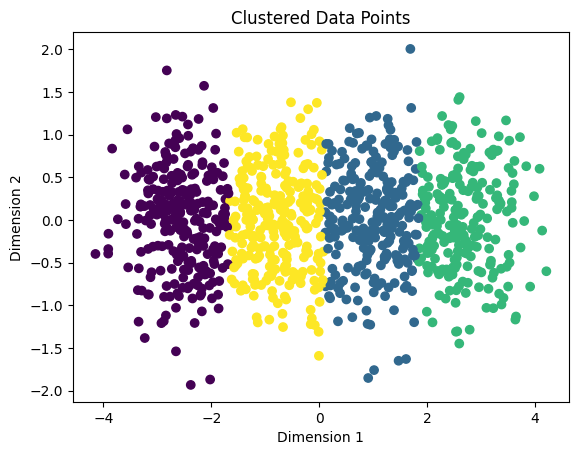

In [15]:
# Plot the clustered data points
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=data_clusters)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Clustered Data Points')
plt.show()


## Use Agglomerative Clustering

In [18]:
# Import the AgglomerativeClustering class
from sklearn.cluster import AgglomerativeClustering

# Create an AgglomerativeClustering object with 3 clusters
agg_clustering = AgglomerativeClustering(n_clusters=4)

# Fit the AgglomerativeClustering model to the data
data_clusters_agg = agg_clustering.fit_predict(data)

data_clusters_agg


array([1, 1, 2, 0, 1, 1, 0, 2, 1, 1, 0, 3, 3, 2, 0, 2, 2, 3, 3, 2, 1, 2,
       1, 1, 2, 1, 0, 1, 1, 2, 3, 1, 0, 2, 2, 1, 3, 2, 1, 3, 2, 2, 0, 3,
       0, 1, 1, 0, 0, 2, 1, 3, 2, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       3, 2, 3, 0, 3, 2, 2, 0, 3, 2, 3, 2, 1, 2, 2, 3, 0, 3, 2, 0, 3, 2,
       2, 3, 3, 3, 2, 2, 3, 2, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 0,
       2, 3, 1, 1, 3, 0, 3, 0, 1, 3, 2, 3, 0, 2, 1, 2, 3, 2, 0, 1, 3, 3,
       2, 2, 3, 3, 2, 1, 2, 3, 1, 3, 2, 1, 0, 0, 2, 0, 2, 2, 0, 1, 1, 2,
       1, 3, 1, 2, 2, 2, 1, 1, 0, 0, 2, 3, 3, 1, 1, 0, 1, 3, 2, 0, 2, 1,
       3, 2, 3, 1, 2, 1, 2, 3, 3, 0, 1, 2, 0, 3, 3, 1, 3, 2, 0, 3, 2, 2,
       1, 0, 3, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 2, 3, 1, 0, 3, 2, 0, 1, 0,
       2, 1, 1, 0, 3, 2, 3, 1, 3, 1, 2, 1, 3, 2, 1, 0, 0, 1, 2, 3, 2, 3,
       0, 2, 2, 1, 0, 1, 1, 3, 0, 2, 3, 1, 0, 0, 0, 1, 0, 1, 2, 0, 2, 2,
       1, 2, 3, 1, 3, 2, 0, 1, 2, 3, 1, 3, 0, 2, 2, 1, 0, 0, 3, 1, 1, 0,
       0, 3, 0, 1, 1, 3, 1, 2, 0, 0, 2, 2, 3, 1, 2,

## Visualize the clustered points

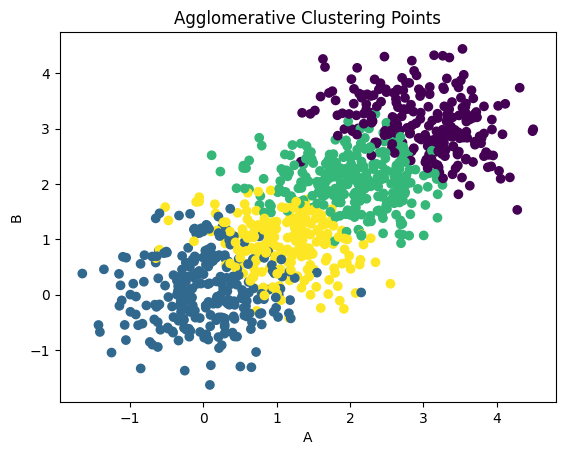

In [19]:
# Plot the Agglomerative Clustering points
plt.scatter(data['A'], data['B'], c=data_clusters_agg)
plt.xlabel('A')
plt.ylabel('B')
plt.title('Agglomerative Clustering Points')
plt.show()
